In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/shyam/Downloads/Data1.csv', parse_dates=[0])

In [3]:
df

,TIME,Sales,Inflation
0,2007-09-01,95.52058,2.414328
1,2007-10-01,95.37652,2.968873
2,2007-11-01,95.53848,3.513978
3,2007-12-01,94.97173,3.455396
4,2008-01-01,95.21674,3.622073
...,...,...,...
172,2022-01-01,118.75020,7.177484
173,2022-02-01,119.17810,7.755183
174,2022-03-01,119.51800,8.766783
175,2022-04-01,119.20840,9.188184


In [4]:
import matplotlib.pyplot as plt

In [5]:
df.set_index('TIME', inplace=True)

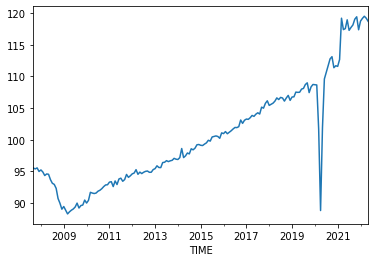

In [6]:
df['Sales'].plot()

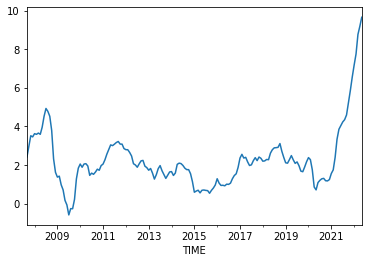

In [7]:
df['Inflation'].plot()

In [8]:
df.describe()

,Sales,Inflation
count,177.000000,177.000000
mean,100.560956,2.258188
std,8.287005,1.551097
min,88.261600,-0.589731
25%,94.500610,1.451779
50%,99.111710,2.006857
75%,106.215700,2.646380
max,119.518000,9.657443


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
target = df['Sales']
exog = df[['Inflation']]
 
ad_fuller_result = adfuller(target)
 
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.6065671963190327
p-value: 0.9877763856555005


In [11]:
target_diff = target.diff()
 
ad_fuller_result = adfuller(target_diff[1:])
 
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -9.240279199169045
p-value: 1.5894197106745656e-15


In [13]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
def optimize_SARIMAX(endog: Union[pd.Series, list] , exog: Union[pd.Series, list], order_list: list, d: int, D: int,  s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [15]:
p = range(0, 2, 1)
d = 1
q = range(0, 2, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 12
 
from itertools import product
parameters = product(p, q, P, Q)
parameters_list = list(parameters) 

In [16]:
result_df = optimize_SARIMAX(df['Sales'], df['Inflation'], parameters_list, d, D, s)
result_df

<ipython-input-14-b161305fb58e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

,"(p,q,P,Q)",AIC
0,"(1, 1, 0, 1)",677.812040
1,"(1, 1, 1, 1)",678.712939
2,"(0, 0, 0, 1)",680.763097
3,"(0, 0, 1, 1)",681.414039
4,"(0, 1, 0, 1)",682.656167
5,"(1, 0, 0, 1)",682.720547
6,"(0, 1, 1, 1)",683.376139
7,"(1, 0, 1, 1)",683.399581
8,"(1, 1, 1, 0)",720.083764
9,"(0, 0, 1, 0)",722.371387


In [17]:
best_model = SARIMAX(df['Sales'], df['Inflation'], order=(1,1,1), seasonal_order=(0,1,1,12), simple_differencing=False)
best_model_fit = best_model.fit(disp=False)
 
print(best_model_fit.summary())
#A Display the summary table of the model

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  177
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -333.906
Date:                            Fri, 23 Sep 2022   AIC                            677.812
Time:                                    18:17:45   BIC                            693.311
Sample:                                09-01-2007   HQIC                           684.104
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflation      1.1920      0.532      2.242      0.025       0.150       2.234
ar.L1         -0.5799      0.216   

In [19]:
SARIMA_model = SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(0,1,1,12), simple_differencing=False)
SARIMA_fit = SARIMA_model.fit(disp=False)
 
print(SARIMA_fit.summary())
#A Display the summary table of the model

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  177
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -337.425
Date:                            Fri, 23 Sep 2022   AIC                            682.849
Time:                                    18:21:54   BIC                            695.249
Sample:                                09-01-2007   HQIC                           687.883
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5425      0.160     -3.383      0.001      -0.857      -0.228
ma.L1          0.7399      0.168   

In [22]:
model_inf1 = SARIMAX(df['Inflation'], order=(0,1,1), seasonal_order=(1,1,1,12))
results_inf1 = model_inf1.fit()

results_inf1.summary()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Inflation   No. Observations:                  177
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -27.984
Date:                            Fri, 23 Sep 2022   AIC                             63.968
Time:                                    18:24:34   BIC                             76.368
Sample:                                09-01-2007   HQIC                            69.002
                                     - 05-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5597      0.063      8.831      0.000       0.435       0.684
ar.S.L12      -0.4095      0.075     -5.440      0.000      -0.557      -0.262
ma.S.L12      -0.9288      0.228     -4.080      0.000      -1.375      -0.483
sigma2         0.0675      0.010      6.895      0.000       0.048       0.087
===================================================================================
Ljung-Box (L1) (Q):                   5.81   Jarque-Bera (JB):                16.18
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.00
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
df2=pd.DataFrame()
df2['Inflation']=results_inf1.forecast(12)

In [26]:
df_new=df.append(df2)

In [27]:
df_new

,Sales,Inflation
2007-09-01,95.52058,2.414328
2007-10-01,95.37652,2.968873
2007-11-01,95.53848,3.513978
2007-12-01,94.97173,3.455396
2008-01-01,95.21674,3.622073
...,...,...
2023-01-01,NaN,9.017107
2023-02-01,NaN,8.843334
2023-03-01,NaN,8.524840
2023-04-01,NaN,8.409592


In [29]:
years = 1
pred_uc1 = best_model_fit.get_forecast(steps=12*years, exog=df_new['Inflation'].iloc[-12:])

In [30]:
pred_uc1.predicted_mean

2022-06-01    119.421385
2022-07-01    119.631051
2022-08-01    119.677741
2022-09-01    119.747573
2022-10-01    119.471192
2022-11-01    119.192752
2022-12-01    118.837011
2023-01-01    118.712869
2023-02-01    118.610652
2023-03-01    118.291794
2023-04-01    117.132243
2023-05-01    117.913706
Freq: MS, Name: predicted_mean, dtype: float64

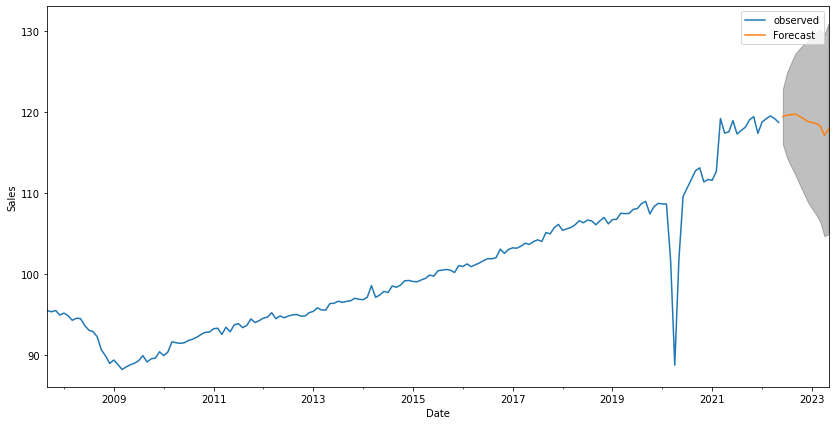

In [34]:
#%% Forecast 1y
years = 1
pred_uc = best_model_fit.get_forecast(steps=12*years, exog=df['Inflation'].iloc[-12:])
pred_ci = pred_uc1.conf_int()
ax = df['Sales'].plot(label='observed', figsize=(14, 7))
pred_uc1.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()
plt.close()